In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow import keras
import re    #for regex
import string
import re    #for regex
import nltk
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D,SpatialDropout1D,GlobalAveragePooling1D, LSTM, SimpleRNN

In [3]:
print(tf.__version__)

2.6.0


In [121]:
train = pd.read_csv('G:/toxic_detector_final_4.csv',usecols =["comment_text","Toxic"])

In [122]:
train.drop_duplicates(inplace = True)

In [123]:
train=train.reset_index(drop=True)

In [124]:
train.dropna(axis=0,how="any")

,comment_text,Toxic
0,They were warning SantiLak in August. Notice ...,0
1,one last comment \n\nI notice there is a stron...,0
2,Fair point. Thanks.66.87.143.199,0
3,Yes there is almost total overlap71.208.252.27,0
4,Stop Wiki-stalking me \nSome of my changes wer...,0
...,...,...
43459,new mutants putlocker” about to be the #1 goog...,1
43460,It was better than the New Mutants. There were...,1
43461,Whenever I THINK that I’m TRULY Fast & Furious...,1
43462,My man wasn't to happy I left on this Harley D...,1


In [125]:
train['comment_text'] = pd.DataFrame(train["comment_text"].astype('str')) 

In [126]:
clean = {
"aren't" : "are not",
"can't" : "can not",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [127]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = [clean[word] if word in clean else word for word in text.split()] 
    
   
    
    return text

In [128]:
train['comment_text_clean'] = train['comment_text'].apply(lambda x: clean_text(x))

In [129]:
x=train["comment_text_clean"]
y=train["Toxic"]

In [130]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [131]:
max_feature = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [132]:
sequences = tokenizer.texts_to_sequences(train_x)

In [133]:
sequences

[[20,
  5,
  38,
  84,
  4112,
  12,
  23,
  1774,
  57,
  844,
  23,
  77,
  232,
  1264,
  7,
  277,
  831,
  155,
  6448,
  5816,
  17,
  1345,
  2219,
  335,
  3,
  18,
  218,
  1,
  5,
  237,
  23,
  713,
  1200,
  50,
  61,
  12,
  11,
  26,
  16,
  23,
  2816,
  3,
  477,
  11,
  26,
  13,
  5321,
  3,
  98,
  1,
  3801,
  2,
  4488,
  4027,
  25,
  2,
  48,
  102,
  3,
  98,
  28,
  1313,
  5051,
  8,
  1331,
  166,
  696,
  31,
  5,
  106,
  1045,
  3,
  1237,
  21,
  5,
  367,
  26,
  4113,
  26,
  5,
  45,
  5193,
  7,
  13,
  1818,
  33,
  13,
  1381,
  48,
  75,
  2,
  14,
  2653,
  3,
  13,
  514,
  7,
  7,
  1265,
  29,
  1,
  4686,
  207,
  26,
  1,
  6719,
  5322,
  7,
  5,
  362,
  280,
  3,
  563,
  33,
  23,
  6449,
  6,
  37,
  208,
  98,
  232,
  453,
  110,
  3,
  200,
  4,
  4394,
  3,
  1,
  4686,
  207,
  3,
  1352,
  277,
  284,
  62,
  175,
  129,
  1,
  207,
  973,
  1,
  3867,
  84,
  3802,
  5,
  82,
  5194,
  1,
  141,
  7,
  70,
  3198,
  11,
  21,
  4,

In [134]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [135]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=500)

In [136]:
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,32,input_length = 500),
                                  tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(32),
                                  tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [137]:
model_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [138]:
history = model_lstm.fit(
    pad_sequences,train_y,
    batch_size= 128,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,shuffle=True)

Epoch 1/20
245/245 [==============================] - 11s 34ms/step - loss: 0.3623 - accuracy: 0.8417 - val_loss: 0.2554 - val_accuracy: 0.9017
Epoch 2/20
245/245 [==============================] - 8s 32ms/step - loss: 0.2090 - accuracy: 0.9185 - val_loss: 0.2343 - val_accuracy: 0.9117
Epoch 3/20
245/245 [==============================] - 8s 32ms/step - loss: 0.1748 - accuracy: 0.9330 - val_loss: 0.2534 - val_accuracy: 0.8997
Epoch 4/20
245/245 [==============================] - 8s 32ms/step - loss: 0.1483 - accuracy: 0.9445 - val_loss: 0.2657 - val_accuracy: 0.9043
Epoch 5/20
245/245 [==============================] - 8s 32ms/step - loss: 0.1272 - accuracy: 0.9522 - val_loss: 0.2697 - val_accuracy: 0.8982
Epoch 6/20
245/245 [==============================] - 8s 32ms/step - loss: 0.1084 - accuracy: 0.9598 - val_loss: 0.3073 - val_accuracy: 0.9028
Epoch 7/20
245/245 [==============================] - 8s 32ms/step - loss: 0.0852 - accuracy: 0.9678 - val_loss: 0.3714 - val_accuracy: 0.901

In [139]:
y_testing=predictions = (model_lstm.predict(x_testing) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,y_testing,digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8894    0.9006    0.8950      4708
           1     0.8808    0.8678    0.8742      3985

    accuracy                         0.8855      8693
   macro avg     0.8851    0.8842    0.8846      8693
weighted avg     0.8855    0.8855    0.8855      8693



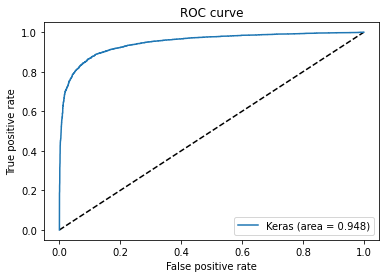

In [140]:
from sklearn.metrics import roc_curve
y_pred_keras =model_lstm.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [87]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_gru_model=Sequential()
bi_gru_model.add(Embedding(4000,64,input_length=500))
bi_gru_model.add(Dropout(0.3))
bi_gru_model.add(Bidirectional(GRU(100))) #bi_rnn with 100 neurons
bi_gru_model.add(Dropout(0.3))
bi_gru_model.add(Dense(1,activation='sigmoid'))
bi_gru_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(bi_gru_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 64)           256000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               99600     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 355,801
Trainable params: 355,801
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
history = bi_gru_model.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=20,  validation_split= 0.1,shuffle=True)

Epoch 1/20
245/245 [==============================] - 32s 115ms/step - loss: 0.4486 - accuracy: 0.7910 - val_loss: 0.3260 - val_accuracy: 0.8623
Epoch 2/20
245/245 [==============================] - 27s 112ms/step - loss: 0.2781 - accuracy: 0.8864 - val_loss: 0.2699 - val_accuracy: 0.8913
Epoch 3/20
245/245 [==============================] - 28s 113ms/step - loss: 0.2294 - accuracy: 0.9078 - val_loss: 0.2543 - val_accuracy: 0.8979
Epoch 4/20
245/245 [==============================] - 28s 115ms/step - loss: 0.2101 - accuracy: 0.9154 - val_loss: 0.2540 - val_accuracy: 0.8999
Epoch 5/20
245/245 [==============================] - 28s 114ms/step - loss: 0.1955 - accuracy: 0.9222 - val_loss: 0.2664 - val_accuracy: 0.8991
Epoch 6/20
245/245 [==============================] - 28s 114ms/step - loss: 0.1838 - accuracy: 0.9247 - val_loss: 0.2627 - val_accuracy: 0.9008
Epoch 7/20
245/245 [==============================] - 28s 114ms/step - loss: 0.1728 - accuracy: 0.9287 - val_loss: 0.2761 - val_ac

In [90]:
y_testing=(bi_gru_model.predict(x_testing) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,y_testing)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4708
           1       0.87      0.88      0.87      3985

    accuracy                           0.88      8693
   macro avg       0.88      0.88      0.88      8693
weighted avg       0.88      0.88      0.88      8693



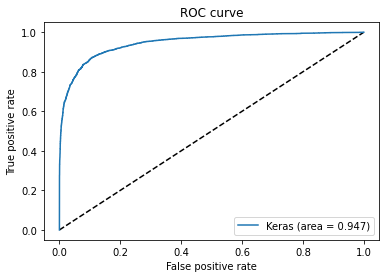

In [91]:
from sklearn.metrics import roc_curve
y_pred_keras =bi_gru_model.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [33]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_gru_model=Sequential()
bi_gru_model.add(Embedding(4000,64,input_length=300))
bi_gru_model.add(SpatialDropout1D(0.2))
bi_gru_model.add(Bidirectional(GRU(128))) #bi_rnn with 100 neurons
bi_gru_model.add(Dense(1,activation='sigmoid'))
bi_gru_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(bi_gru_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 64)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               148992    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 405,249
Trainable params: 405,249
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
history = bi_gru_model.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=10,  validation_split= 0.1,shuffle=True)

Train on 28125 samples, validate on 3126 samples
Epoch 1/10
28125/28125 [==============================] - 19s 667us/sample - loss: 0.3952 - accuracy: 0.8147 - val_loss: 0.2862 - val_accuracy: 0.8797
Epoch 2/10
28125/28125 [==============================] - 16s 558us/sample - loss: 0.2491 - accuracy: 0.8995 - val_loss: 0.2595 - val_accuracy: 0.8919
Epoch 3/10
28125/28125 [==============================] - 16s 557us/sample - loss: 0.2200 - accuracy: 0.9126 - val_loss: 0.2591 - val_accuracy: 0.8903
Epoch 4/10
28125/28125 [==============================] - 16s 560us/sample - loss: 0.1968 - accuracy: 0.9212 - val_loss: 0.2578 - val_accuracy: 0.8912- loss: 0.1921  - ETA: 1s - loss: 0.1951 - accuracy: 0. - ETA
Epoch 5/10
28125/28125 [==============================] - 16s 570us/sample - loss: 0.1817 - accuracy: 0.9280 - val_loss: 0.2723 - val_accuracy: 0.8944
Epoch 6/10
28125/28125 [==============================] - 16s 560us/sample - loss: 0.1688 - accuracy: 0.9337 - val_loss: 0.3058 - val_a

In [35]:
y_testing=bi_gru_model.predict_classes(x_testing)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,y_testing)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3998
           1       0.89      0.85      0.87      3815

    accuracy                           0.88      7813
   macro avg       0.88      0.87      0.87      7813
weighted avg       0.88      0.88      0.88      7813



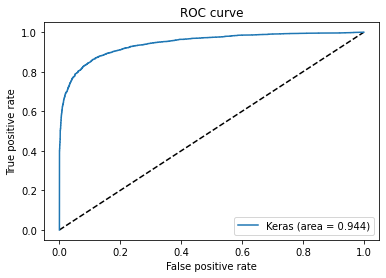

In [36]:
from sklearn.metrics import roc_curve
y_pred_keras =bi_gru_model.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [170]:
bi_gru_model.save('Test_model_drop_out')

INFO:tensorflow:Assets written to: Test_model_drop_out\assets


INFO:tensorflow:Assets written to: Test_model_drop_out\assets


In [242]:
from tensorflow.keras.models import load_model 
new_model = tf.keras.models.load_model('Test_model_drop_out')

In [243]:
import pickle
with open('tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)

In [51]:
sample_text=["There isn't really much to say about this overly dumb and centrally propaganda set film except for it is god awful. It's stupidly incoherent, let alone not have any English subtitles to use. It also features some of the worst editing, cinematography and acting I've ever seen. This piece of nonsense propaganda for god knows what pretty much fails to do everything that propaganda should do; convince it's audience that the maker of such propaganda is the right person/ideology to follow."]
sequences = tokenizer.texts_to_sequences(sample_text)

In [102]:
sample_text=["When you wake up from a good dream, you feel the reality is harsh. When you wake up after a bad dream, you will be sentimentally attached to the beauty of reality. But as long as life is good, reality and dreams don't matter."]
sequences = tokenizer.texts_to_sequences(sample_text)

In [112]:
sample_text=["I enjoyed watching the movie, but it is obvious from its name and poster that it is a terrible movie. I don't regret watching :)"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [107]:
sample_text=["Started Binging to Catch up and WOW what a PIECE OF CRAP"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [113]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [114]:
pad_sequences 

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [115]:
predictions =model_lstm.predict(pad_sequences) 


In [116]:
predictions

array([[3.3333094e-05]], dtype=float32)